In [11]:
import plotly.graph_objects as go

# Beispiel-Daten: Windrichtung in Grad (0° = N, 90° = E, 180° = S, 270° = W)
wind_directions = [0]  # Nord
wind_speeds = [30]  # Windgeschwindigkeit

# Erstellen des Plots
fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=wind_speeds,  # Windgeschwindigkeit als Radius
    theta=wind_directions,  # Windrichtung in Grad
    width=45,  # Breite der Balken (45° für 8 Himmelsrichtungen)
    marker=dict(
        color=wind_speeds,
        colorscale='Oranges',
        showscale=True,
        colorbar=dict(
            x=0.8,  # Näher ans Diagramm bringen (1.0 wäre ganz rechts)
            y=0.5,  # In die Mitte des Diagramms setzen
            len=0.5,  # Höhe der Colorbar reduzieren
            title="Wind (m/s)"  # Titel der Skala
        )
    )
))

# Theme anwenden
fig.update_layout(
    plot_bgcolor="#78d278",  # Hintergrund des Plots
    font=dict(color="#053246"),  # Allgemeine Textfarbe
    polar=dict(
        radialaxis=dict(showticklabels=False, ticksuffix=" m/s"),
        angularaxis=dict(direction="clockwise", tickmode="array",
                         tickvals=[0, 90, 180, 270],
                         ticktext=['N', 'E', 'S', 'W'])  # Himmelsrichtungen
    )
)

fig.show()


In [1]:
import datetime
print(datetime.datetime.now())

2025-04-17 12:03:18.176871


In [33]:
import requests
import datetime

# Basis-URL der API
url = "https://timeseries.geomar.de/soop/FROST-Server/v1.1/Datastreams(35)/Observations"

# Zeitfilter: Letztes Jahr
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

# Formatieren der Datumswerte für den API-Filter (ISO 8601)
start_date_str = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")
end_date_str = end_date.strftime("%Y-%m-%dT%H:%M:%SZ")

# API-Query-Parameter für den Zeitfilter
params = {
    "$filter": f"phenomenonTime ge {start_date_str} and phenomenonTime le {end_date_str}",
    "$top": 10000  # Anzahl der zurückgegebenen Einträge erhöhen, falls notwendig
}

# Anfrage senden
response = requests.get(url, params=params)

# Überprüfung der Antwort
if response.status_code == 200:
    data = response.json()  # JSON-Daten extrahieren
    print("Daten empfangen:", len(data.get("value", [])), "Einträge")
else:
    print("Fehler:", response.status_code, response.text)


Daten empfangen: 10000 Einträge


In [34]:
import pandas as pd
# display data keys
df = pd.DataFrame(data['value'])


df

,@iot.selfLink,@iot.id,phenomenonTime,resultTime,result,parameters,Datastream@iot.navigationLink,FeatureOfInterest@iot.navigationLink
0,https://timeseries.geomar.de/soop/FROST-Server...,22146,2024-05-20T00:02:30Z,2024-05-20T00:02:30Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
1,https://timeseries.geomar.de/soop/FROST-Server...,22151,2024-05-20T00:05:00Z,2024-05-20T00:05:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
2,https://timeseries.geomar.de/soop/FROST-Server...,22153,2024-05-20T00:00:00Z,2024-05-20T00:00:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
3,https://timeseries.geomar.de/soop/FROST-Server...,22158,2024-05-20T00:08:00Z,2024-05-20T00:08:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
4,https://timeseries.geomar.de/soop/FROST-Server...,22233,2024-05-20T00:03:00Z,2024-05-20T00:03:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
...,...,...,...,...,...,...,...,...
9995,https://timeseries.geomar.de/soop/FROST-Server...,396994,2024-07-20T08:09:00Z,2024-07-20T08:09:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
9996,https://timeseries.geomar.de/soop/FROST-Server...,397006,2024-07-27T05:00:00Z,2024-07-27T05:00:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
9997,https://timeseries.geomar.de/soop/FROST-Server...,397013,2024-07-20T08:13:00Z,2024-07-20T08:13:00Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...
9998,https://timeseries.geomar.de/soop/FROST-Server...,397081,2024-07-27T04:57:30Z,2024-07-27T04:57:30Z,0.0,{'q_flag': 'None'},https://timeseries.geomar.de/soop/FROST-Server...,https://timeseries.geomar.de/soop/FROST-Server...


<Axes: >

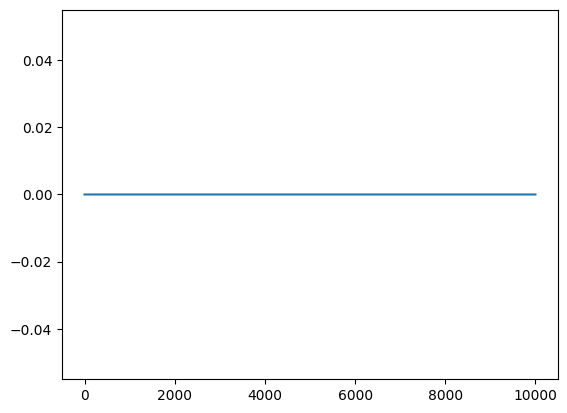

In [35]:
df.result.plot()